https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html




```
/opt/conda/lib/python3.7/site-packages/hdbscan/__init__.py in <module>
----> 1 from .hdbscan_ import HDBSCAN, hdbscan
      2 from .robust_single_linkage_ import RobustSingleLinkage, robust_single_linkage
      3 from .validity import validity_index
      4 from .prediction import (approximate_predict,
      5                          membership_vector,
      
      

/opt/conda/lib/python3.7/site-packages/hdbscan/hdbscan_.py in <module>
     19 from scipy.sparse import csgraph
     20 
---> 21 from ._hdbscan_linkage import (single_linkage,
     22                                mst_linkage_core,
     23                                mst_linkage_core_vector,
      ```
      

As of version chayapan/thesis:v1.0.1 this is fixed. See build step in Dockerfile.




In [1]:
import hdbscan
# import debacl
# import fastcluster
import sklearn.cluster
import scipy.cluster
import sklearn.datasets
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_palette('Paired', 10)
sns.set_color_codes()

In [2]:
# The simple case
# https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html
# 2000 samples each with 10 features

from sklearn.datasets import make_blobs
import pandas as pd

In [3]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,2.337167,5.687592,-6.869720,-5.436491,4.227865,-3.727011,8.526904,-8.556411,-5.605731,6.470860
1,2.754950,7.756664,-6.885613,-3.596226,4.852922,-2.217172,5.675773,-6.598698,-8.668537,5.569821
2,-7.158309,7.011150,0.407239,-2.314527,-7.514917,-7.150568,3.453611,-2.960666,-1.964321,-4.292421
3,1.963940,-0.036767,9.340397,8.284645,-4.891297,4.789166,-3.578186,-0.390656,-5.355916,9.756967
4,-7.593509,8.148816,-0.232373,-2.379481,-6.958312,-7.367644,1.016147,-1.337661,-2.761910,-3.122908


In [4]:
import hdbscan

In [5]:
clusterer = hdbscan.HDBSCAN()

In [6]:
clusterer.fit(blobs)

HDBSCAN()

In [7]:
clusterer.labels_

array([2, 2, 1, ..., 1, 1, 0])

In [8]:
clusterer.labels_.max()

2

In [9]:
clusterer.probabilities_

array([0.6912082 , 0.90313931, 0.88779266, ..., 0.56255542, 0.44793007,
       0.79213496])

In [10]:
# What about different metrics?
# data that is embedded in a vector space may not want to consider distances between data points to be pure Euclidean distance.

clusterer = hdbscan.HDBSCAN(metric='manhattan')
clusterer.fit(blobs)
clusterer.labels_

array([1, 1, 2, ..., 2, 2, 0])

In [11]:
# List support matric

hdbscan.dist_metrics.METRIC_MAPPING

{'euclidean': hdbscan.dist_metrics.EuclideanDistance,
 'l2': hdbscan.dist_metrics.EuclideanDistance,
 'minkowski': hdbscan.dist_metrics.MinkowskiDistance,
 'p': hdbscan.dist_metrics.MinkowskiDistance,
 'manhattan': hdbscan.dist_metrics.ManhattanDistance,
 'cityblock': hdbscan.dist_metrics.ManhattanDistance,
 'l1': hdbscan.dist_metrics.ManhattanDistance,
 'chebyshev': hdbscan.dist_metrics.ChebyshevDistance,
 'infinity': hdbscan.dist_metrics.ChebyshevDistance,
 'seuclidean': hdbscan.dist_metrics.SEuclideanDistance,
 'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance,
 'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance,
 'hamming': hdbscan.dist_metrics.HammingDistance,
 'canberra': hdbscan.dist_metrics.CanberraDistance,
 'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance,
 'matching': hdbscan.dist_metrics.MatchingDistance,
 'jaccard': hdbscan.dist_metrics.JaccardDistance,
 'dice': hdbscan.dist_metrics.DiceDistance,
 'kulsinski': hdbscan.dist_metrics.KulsinskiDistance,
 'rogerst

In [12]:
# Distance matrices

from sklearn.metrics.pairwise import pairwise_distances

distance_matrix = pairwise_distances(blobs)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_

array([1, 1, 2, ..., 2, 2, 0])

In [13]:
# More Information About a Clustering
# https://hdbscan.readthedocs.io/en/latest/advanced_hdbscan.html
# During processing HDBSCAN* builds a hierarchy of potential clusters, from which it extracts the flat clustering returned.

In [16]:
!wget https://github.com/scikit-learn-contrib/hdbscan/raw/master/notebooks/clusterable_data.npy

--2021-03-17 12:35:50--  https://github.com/scikit-learn-contrib/hdbscan/raw/master/notebooks/clusterable_data.npy
Resolving github.com (github.com)... 52.74.223.119
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy [following]
--2021-03-17 12:35:50--  https://raw.githubusercontent.com/scikit-learn-contrib/hdbscan/master/notebooks/clusterable_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37024 (36K) [application/octet-stream]
Saving to: ‘clusterable_data.npy’

clusterable_data.np 100%[===================>]  36.16K  --.-KB/s    in 0.008s  

2021-03-17 12:35:51 (4.70 MB/

In [17]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# data = np.load('clusterable_data.bin')
#or
data = np.load('clusterable_data.npy')
#depending on the format of the file

In [18]:
data.shape

(2309, 2)

In [19]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

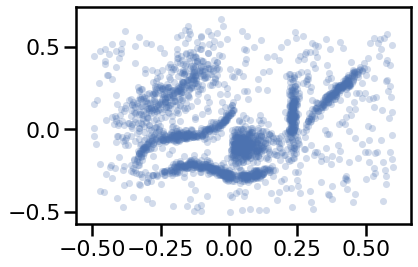

In [20]:
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.25)

In [21]:
# We can cluster the data as normal, and visualize the labels

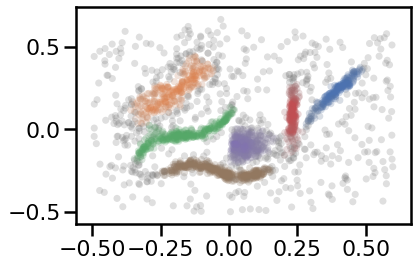

In [22]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [23]:
# Condensed Trees

clusterer.condensed_tree_

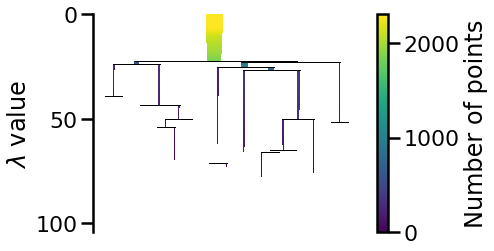

In [24]:
clusterer.condensed_tree_.plot()

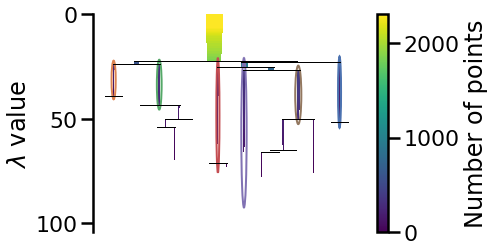

In [25]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

In [27]:
clusterer.condensed_tree_.to_pandas()

,parent,child,lambda_val,child_size
0,2309,2048,5.016526,1
1,2309,2006,5.076503,1
2,2309,2024,5.279133,1
3,2309,2050,5.347332,1
4,2309,1992,5.381930,1
...,...,...,...,...
2332,2318,1175,86.550737,1
2333,2318,988,86.550737,1
2334,2318,1105,86.550737,1
2335,2318,965,86.550737,1


In [28]:
# Single Linkage Trees
# https://hdbscan.readthedocs.io/en/latest/advanced_hdbscan.html

clusterer.single_linkage_tree_

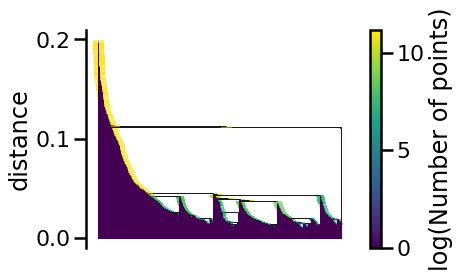

In [29]:
clusterer.single_linkage_tree_.plot()

In [30]:
clusterer.single_linkage_tree_.get_clusters(0.023, min_cluster_size=2)

array([ 0, -1,  0, ..., -1, -1,  0])